<img style="float: right; margin: 0px 0px 15px 15px;" src="https://www.avatrade.es/wp-content/themes/ava_trade/assets/images/inner-pages/seo/rsi-0.png" width="300px" height="100px" />


# Estrategia  de inversión RSI y simulación del adjusted close a un año 

### Objetivos.
#### 1.1 Objetivo general.
>  - Medir el impulso de los cambios en el precio de un activo para evaluar si el precio de dicho activo está sobrevendido o sobrecomprado.
>  - Predecir el comportamiento de la estrategia el siguiente año, con valores previamente simulados.
#### 1.2 Objetivos específicos
>  - Plantear una estrategia de inversión exitosa, mediante automatizar la compra y venta de acciones tomando en cuenta el RSI, el tiempo que tenemos posesión de una acción y mediante solo comprar la acción de nuevo, hasta que hayamos vendido la primera.
>  - Aplicar está estrategia a la simulación realizada en clase y verificar que está también presente rendimientos positivos.


In [161]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import pandas_datareader.data as web
%matplotlib inline
pd.options.mode.chained_assignment = None

**1. Implementar el capital, que es el monto con el que nos vamos a estar rodeando**

In [162]:
Capital = 1000000

**2. Generamos un DataFrame que contiene toda la información de la acción, donde calculamos un moving average que es el promedio de todos los cambios de las acciones de los últimos 200 días y con esto generamos:** 
- Price change
- Upmove (cuanto cambia la acción y aplicar en valores que son mayores a cero)
- Downmove (cuanto cambia la acción y aplicar en valores que son menores a cero)
- Average Up
- Average Down 

**Estos movimientos nos ayudaran a generar el RSI, procedemos a calcular el RS que es avr up/avr down (que es el cambio) y seguimos con RSI utilizando la formula: $$RSI = 100 – 100 / (1 + RS)$$ Finalmente agregamos nuestros parametros, (entre más bajo sea el RSI sobrevendida la acción --> más alto sobrecomprada) cuando el adj close es mayor al moving average y el RSI es menor a 30 en buy es si, de lo contrario buy es no.**

In [163]:
def RSIcalc(activo): #names
    df = yf.download(activo,start='2012-11-01')
    df['MA200'] = df['Adj Close'].rolling(window=200).mean()
    df['Price Change'] = df['Adj Close'].pct_change()
    df['Upmove'] = df['Price Change'].apply(lambda x: x if x>0 else 0)
    df['Downmove'] = df['Price Change'].apply(lambda x: abs(x) if x<0 else 0)
    df['Avg Up'] = df["Upmove"].ewm(span=19).mean()
    df['Avg Down'] = df["Downmove"].ewm(span=19).mean()
    df = df.dropna()
    df['RS'] = (df['Avg Up']/df['Avg Down'])
    df['RSI']= df['RS'].apply(lambda x: 100-(100/(x+1)))
    df.loc[(df['Adj Close'] > df['MA200']) & (df['RSI']<30), 'Buy'] = 'Yes'
    df.loc[(df['Adj Close'] < df['MA200']) | (df['RSI']>30), 'Buy'] = 'No'
    return df

**3. Metemos nuestro activo de APPLE**

In [164]:
RSIcalc('AAPL')

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,MA200,Price Change,Upmove,Downmove,Avg Up,Avg Down,RS,RSI,Buy
Date,,,,,,,,,,,,,,,
2013-08-19 00:00:00-04:00,18.012142,18.347857,18.000000,18.133572,15.919973,510518400,14.495806,0.010770,0.010770,0.000000,0.011206,0.002129,5.263886,84.035469,No
2013-08-20 00:00:00-04:00,18.203930,18.234644,17.886429,17.895357,15.710841,358688400,14.483015,-0.013136,0.000000,0.013136,0.010085,0.003230,3.122772,75.744476,No
2013-08-21 00:00:00-04:00,17.985357,18.112499,17.900000,17.941429,15.751295,335879600,14.473449,0.002575,0.002575,0.000000,0.009334,0.002907,3.211360,76.254701,No
2013-08-22 00:00:00-04:00,18.035000,18.056786,17.792856,17.962856,15.770106,244207600,14.462780,0.001194,0.001194,0.000000,0.008520,0.002616,3.257013,76.509351,No
2013-08-23 00:00:00-04:00,17.973928,17.976786,17.833929,17.893572,15.709272,222731600,14.452078,-0.003858,0.000000,0.003858,0.007668,0.002740,2.798489,73.673743,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-26 00:00:00-04:00,150.960007,151.990005,148.039993,149.350006,149.350006,88194300,156.721644,-0.019627,0.000000,0.019627,0.009922,0.007322,1.355160,57.540039,No
2022-10-27 00:00:00-04:00,148.070007,149.050003,144.130005,144.800003,144.800003,109180200,156.573852,-0.030465,0.000000,0.030465,0.008930,0.009636,0.926718,48.098277,No
2022-10-28 00:00:00-04:00,148.199997,157.500000,147.820007,155.740005,155.740005,164762400,156.478519,0.075553,0.075553,0.000000,0.015592,0.008673,1.797885,64.258711,No


**4. Creamos una función que contiene dos listas vacias que es en donde guardaremos las fechas en las que compramos y las que vendemos.**
- **Utilizamos un ciclo for que utilizara el rango dentro de la longitud del DataFrame, si en la columna de buy aparece yes, esa fecha se agregara a la lista de buying dates.** 
- **Como es lista dentro de lista la "i" cambia a "j", si el rango es de 1-30 dias se corre la función**

> - **Si el RSI es mayor a 60 VENDELO y luego se toma esa fecha y se agrega a selling dates**

- Se rompe el ciclo

> - **O si la fecha es a 30 agrega la fecha a selling dates y VENDELO**

In [165]:
def indicadores(df):
    Buying_dates = []
    Selling_dates =[]
    
    for i in range(len(df)):
        if "Yes" in df['Buy'].iloc[i]:
            Buying_dates.append(df.iloc[i+1].name)
            for j in range(1,31):
                if df['RSI'].iloc[i + j] > 60:
                    Selling_dates.append(df.iloc[i+j+1].name)
                    break
                elif j==30:
                    Selling_dates.append(df.iloc[i+j+1].name)
                    
    return Buying_dates, Selling_dates

**5. Se toma el calculo de RSI (DataFrame) y se guarda como la variable AAPL, esto te regresa las fechas en las que compraste y en las que vendiste**

In [166]:
AAPL = RSIcalc("AAPL")
Buy, Sell = indicadores(AAPL)

[*********************100%***********************]  1 of 1 completed


**6. Graficamos los adjusted close de la acción, así mismo en verde se puede observar como esta graficando el RSI**

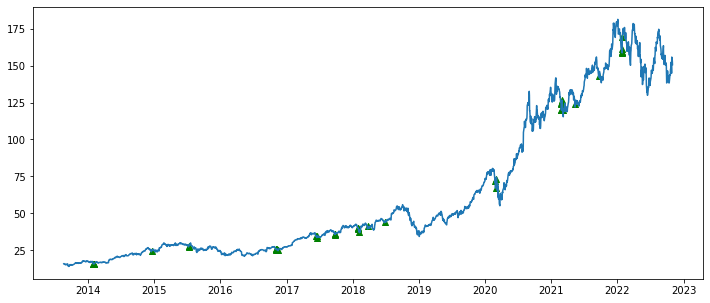

In [167]:
plt.figure(figsize=(12,5))
plt.scatter(AAPL.loc[Buy].index , AAPL.loc[Buy]['Adj Close'], marker='^',c='g')
plt.plot(AAPL['Adj Close'])

**6. Sacamos rendimiento, lo adjuntamos a una lista y graficamos**

In [168]:
rendimiento = (AAPL.loc[Sell].Open.values - AAPL.loc[Buy].Open.values)/(AAPL.loc[Buy].Open.values)
rendimiento

array([ 0.0654827 ,  0.06847222,  0.08435324,  0.06832337,  0.06148077,
        0.0617998 ,  0.04222853,  0.05855338,  0.01696588,  0.02081454,
        0.04385886,  0.0291606 ,  0.05759894,  0.06305716,  0.01128026,
        0.03505361,  0.03591816,  0.05437512,  0.06527097,  0.05270787,
        0.04126141,  0.0328999 ,  0.03104626,  0.08334377,  0.05009816,
        0.0421881 , -0.08302799,  0.04295261, -0.00807708,  0.02213961,
        0.01248597,  0.01459737,  0.03189497,  0.02222222,  0.0627573 ,
        0.04302457,  0.02139931,  0.08742651,  0.09454019,  0.06428131,
        0.07116034,  0.05008743])

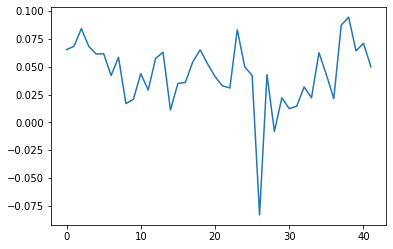

In [169]:
plt.plot(rendimiento)

**7. Queremos observar de todos los datos que tenemos a cuales les ganamos, entonces las ganancias seran igual a los datos en la lista de rendimiento que sean mayores a cero, para sacar la probabilidad de ganancias se utiliza la formula:** $$(Ganancias)/(ListaDeRendimientos)*100)$$
**Ya con esto se compactan todos los rendimientos y se mete a un DataFrame, donde te da sus características estadísticas.**

In [170]:
ganancias = [i for i in rendimiento if i > 0]

In [171]:
print("La probabilidad para ganar es del:", (len(ganancias)/len(rendimiento)*100),"%")

La probabilidad para ganar es del: 95.23809523809523 %


In [172]:
tablar  = pd.DataFrame(columns=["Rendimientos"], data=rendimiento)
tablar.index.name = "Movimientos"
tablar.describe()

,Rendimientos
count,42.000000
mean,0.043511
std,0.030515
min,-0.083028
25%,0.029632
50%,0.043442
75%,0.062982
max,0.094540


**8. Con el promedio de todos los rendimientos lo guardo en la variable Tasar, en la cual le indicamos que ese 4.35% lo multiplique por el capital para que de la utilidad**

In [286]:
Tasar = tablar.mean()
Utilidad = Tasar*Capital
print("La utilidad de la inversión fue de:",int(Utilidad),"dólares americanos.")


La utilidad de la inversión fue de: 43510 dólares americanos.


Por el momento la tasa de rendimiento de la tesorería de Estados Unidos está en 2.8%, vea aqui: https://www.bing.com/search?q=TIR+10+años+bonos+EUA&qs=n&form=QBRE&msbsrank=7_7__0&sp=-1&pq=tir+10+años+bonos+eua&sc=7-21&sk=&cvid=25776AB26F074BD3AA54F42492912311&ghsh=0&ghacc=0&ghpl=

Ahora la simulación: se necesitar un data frame con valores simulados para predecir el comportamiento de la estrategia el siguiente año.

Simular los datos deL activo para el siguiente año y ver la utilidad / rendimiento


**9. Descargamos los datos para apple del 2012 a 2022**

In [174]:
names = ["AAPL"]
def getClose(name, start, end):
    return web.DataReader(name, "yahoo", start, end)["Adj Close"]
df2 = getClose(names, '2012-11-01', "2022-11-01")
df2

Symbols,AAPL
Date,
2012-11-01,18.268991
2012-11-02,17.664459
2012-11-05,17.903944
2012-11-06,17.849733
2012-11-07,17.166759
...,...
2022-10-26,149.350006
2022-10-27,144.800003
2022-10-28,155.740005


**10. Rendimiento**

<AxesSubplot:xlabel='Date'>

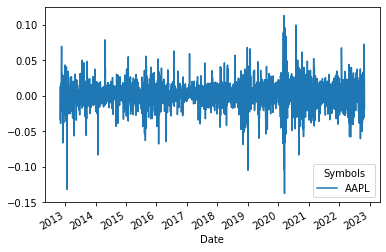

In [175]:
r = np.log(df2/df2.shift(1))
r.plot()

**11. Simulo estos rendimientos 1000 veces**

In [178]:
media_AAPL = r["AAPL"].mean()
std_AAPL = r["AAPL"].std()

def sim_r(media, std, inicio, dias, N):
    r = np.random.normal(media, std, size=(dias, N)) # simula x dias N veces de una distribuicion normal
    fechas = pd.date_range(inicio, periods=dias)
    return pd.DataFrame(index=fechas, data=r)

sim_rAAPL = sim_r(media_AAPL,std_AAPL, "2022-11-2",365,1000)
sim_rAAPL.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2022-11-02,-0.001526,-0.010383,-0.032555,-0.005748,-0.011773,0.031249,0.004175,-0.032538,0.020413,-0.004608,...,0.013822,0.005978,-0.014682,-0.005497,0.038976,-0.001410,-0.000071,-0.014505,0.001870,0.008567
2022-11-03,-0.000464,-0.001336,-0.003913,-0.013952,-0.000125,-0.009121,-0.032686,-0.002151,0.016499,-0.017235,...,0.010489,0.033802,0.018373,-0.008969,-0.005876,-0.009555,0.006435,0.011445,-0.007344,0.024109
2022-11-04,0.031515,0.035474,-0.024753,-0.006214,0.011890,0.000796,0.029173,-0.005153,0.018696,0.002887,...,-0.026789,0.010502,0.003343,0.000923,0.014171,0.017007,0.003349,0.015037,-0.017900,0.012259
2022-11-05,-0.014008,-0.005861,-0.003312,0.009386,-0.009135,-0.012054,-0.018565,0.053228,-0.003652,-0.014513,...,0.011322,-0.006262,0.037869,0.006232,0.006827,0.055138,-0.006837,0.018088,0.004191,0.034661
2022-11-06,-0.033516,-0.017886,0.001767,0.004280,-0.004807,-0.028747,0.037552,0.001428,-0.008378,0.018422,...,-0.004635,-0.010339,-0.005510,-0.034509,-0.007750,-0.006447,0.037869,0.007725,0.025222,0.024171


**11. Queremos saber el valor de todas esas acciones los siguientes 365 y que todo eso se guarde en un DataFrame, en la columna adj close el valor simulado.**

In [217]:
valor_AAPL = (1+sim_rAAPL).cumprod()*df2["AAPL"][-1]
datasim = pd.DataFrame(columns = ['AdjClose'], data =valor_AAPL.mean(axis=1))
datasim.index.name = 'Date'
datasim

,AdjClose
Date,
2022-11-02,150.889387
2022-11-03,151.056571
2022-11-04,151.190623
2022-11-05,151.321085
2022-11-06,151.530470
...,...
2023-10-28,204.911518
2023-10-29,204.958715
2023-10-30,204.947817


**12. Una vez que tenemos nuestros precios al cierre simulados corremos nuestra estrategia.**

In [274]:
def RSIcalc_sim(frame): #names
    df2 = frame
    df2['MA200'] = df2['AdjClose'].rolling(window=200).mean()
    df2['Price Change'] = df2['AdjClose'].pct_change()
    df2['Upmove'] = df2['Price Change'].apply(lambda x: x if x>0 else 0)
    df2['Downmove'] = df2['Price Change'].apply(lambda x: abs(x) if x<0 else 0)
    df2['Avg Up'] = df2["Upmove"].ewm(span=19).mean()
    df2['Avg Down'] = df2["Downmove"].ewm(span=19).mean()
    df2 = df2.dropna()
    df2['RS'] = (df2['Avg Up']/df2['Avg Down'])
    df2['RSI']= df2['RS'].apply(lambda x: 100-(100/(x+1)))
    df2.loc[(df2['AdjClose'] > df2['MA200']) & (df2['RSI']<94), 'Buy'] = 'Yes'
    df2.loc[(df2['AdjClose'] < df2['MA200']) | (df2['RSI']>94), 'Buy'] = 'No'
    return df2

**13. Se grafica el RSI como esta, porque si se deja en 30 nuca se va a compra ni vender**

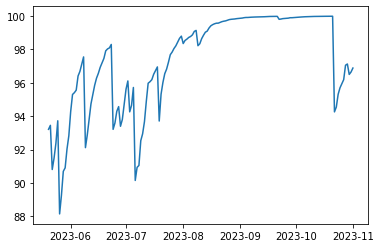

In [275]:
tabla_sim = RSIcalc_sim(datasim)
plt.plot(tabla_sim["RSI"])

**14. Se guarda en otra tabla simulada, en la cual todos los miles escenarios estan resumidos en esta tabla**

In [276]:
tabla_sim

,AdjClose,MA200,Price Change,Upmove,Downmove,Avg Up,Avg Down,RS,RSI,Buy
Date,,,,,,,,,,
2023-05-20,178.595114,164.304858,0.000697,0.000697,0.000000,0.000778,0.000057,13.736223,93.214001,Yes
2023-05-21,178.643962,164.443631,0.000274,0.000274,0.000000,0.000727,0.000051,14.272854,93.452435,Yes
2023-05-22,178.607466,164.581385,-0.000204,0.000000,0.000204,0.000655,0.000066,9.874928,90.804537,Yes
2023-05-23,178.701881,164.718941,0.000529,0.000529,0.000000,0.000642,0.000060,10.760823,91.497194,Yes
2023-05-24,178.834056,164.856506,0.000740,0.000740,0.000000,0.000652,0.000054,12.138100,92.388549,Yes
...,...,...,...,...,...,...,...,...,...,...
2023-10-28,204.911518,187.912434,0.002239,0.002239,0.000000,0.000956,0.000029,32.960280,97.055384,No
2023-10-29,204.958715,188.068462,0.000230,0.000230,0.000000,0.000884,0.000026,33.842333,97.129928,No
2023-10-30,204.947817,188.223293,-0.000053,0.000000,0.000053,0.000795,0.000029,27.598236,96.503281,No


**15. Una vez que se tiene la tabla se puede correr los indicadores, se guardan las dos lista y se corre la funcion para determinar las buying and selling dates**

In [277]:
def indicadores_sim(df):
    Buying_dates = []
    Selling_dates =[]
    
    for i in range(len(df)):
        if "Yes" in df['Buy'].iloc[i]:
            Buying_dates.append(df.iloc[i+1].name)
            for j in range(1,101):
                if df['RSI'].iloc[i + j] > 95:
                    Selling_dates.append(df.iloc[i+j+1].name)
                    break
                elif j==30:
                    Selling_dates.append(df.iloc[i+j+1].name)
                    
    return Buying_dates, Selling_dates

In [278]:
Buy, Sell = indicadores_sim(tabla_sim)

**16. Ahora calculamos el rendimiento simulado:**

In [279]:
rendimiento_sim = (tabla_sim.loc[Sell].AdjClose.values - tabla_sim.loc[Buy].AdjClose.values)/(tabla_sim.loc[Buy].AdjClose.values)
rendimiento_sim

array([0.00891314, 0.00911929, 0.00858614, 0.0078407 , 0.00647819,
       0.00692043, 0.00621722, 0.005203  , 0.00504439, 0.00415219,
       0.00342428, 0.00178095, 0.00475225, 0.0036094 , 0.00216329,
       0.00501296, 0.00409173, 0.00336113, 0.00226481, 0.00607804,
       0.00598819, 0.00475516, 0.00436303, 0.00362453, 0.00210305,
       0.00125381])

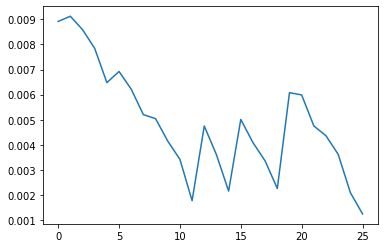

In [280]:
plt.plot(rendimiento_sim)

In [282]:
ganancias_sim = [i for i in rendimiento_sim if i > 0]
print("La probabilidad para ganar es del:", (len(ganancias_sim)/len(rendimiento_sim)*100),"%")

La probabilidad para ganar es del: 100.0 %


In [283]:
tablar_sim  = pd.DataFrame(columns=["Rendimientos Simulados"], data=rendimiento_sim)
tablar_sim.index.name = "Movimientos"
tablar_sim.describe()

,Rendimientos Simulados
count,26.000000
mean,0.004889
std,0.002207
min,0.001254
25%,0.003471
50%,0.004754
75%,0.006182
max,0.009119


In [285]:
Tasar_sim = tablar_sim.mean()
Utilidad_sim = Tasar_sim*Capital
print("La utilidad de la inversión fue de:",int(Utilidad_sim),"dólares americanos.")


La utilidad de la inversión fue de: 4888 dólares americanos.
